In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('/Users/georg/Projects/Tiny Games in Python/tic_tac_toe/tic_tac_toe/results/Random Agent_vs_Random Agent.txt', 'r', encoding='utf-8') as file:
    results_text = file.read()

In [3]:
# Each line in results_text is a game result, split by commas
game_rows = [game.split(',') for game in results_text.splitlines()]
for idx, row in enumerate(game_rows):
    game_rows[idx] = [val.strip() for val in row]  # Strip whitespace from each value
# Create a DataFrame, assuming each row has the same number of columns
df = pd.DataFrame(game_rows)
df.columns = ['Game', 'Rounds', 'Init Turn', 'Winner', 'Result', 'Mean Time X', 'Mean Time O']  # Set column names
df.head()

,Game,Rounds,Init Turn,Winner,Result,Mean Time X,Mean Time O
0,0,8,O,None,Draw,0.0,0.0
1,1,6,X,Random Agent,O,0.0,0.0
2,2,6,X,Random Agent,O,0.0,0.0
3,3,8,X,Random Agent,O,0.0,0.0
4,4,7,X,Random Agent,X,0.0,0.0


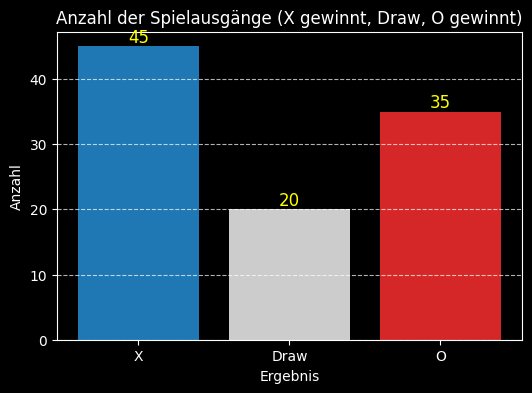

In [ ]:
# Erstelle ein Balkendiagramm für die Anzahl X gewinnt, Draw und O gewinnt (Draw in der Mitte)
plt.style.use('dark_background')
result_counts = df['Result'].value_counts().reindex(['X', 'Draw', 'O'], fill_value=0)

plt.figure(figsize=(6, 4))
bars = plt.bar(result_counts.index, result_counts.values, color=['#1f77b4', '#cccccc', '#d62728'])
plt.title('Anzahl der Spielausgänge (X gewinnt, Draw, O gewinnt)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Werte auf die Balken schreiben
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='yellow', fontsize=12)

plt.show()

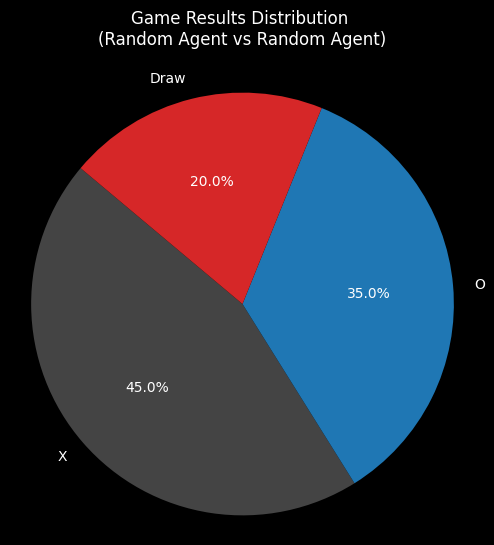

In [4]:
# Count the number of wins for each Result in the DataFrame
result_counts = df['Result'].value_counts()

plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
plt.pie(
    result_counts, 
    labels=result_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=['#444444', '#1f77b4', '#d62728']  # darker shades for dark theme
)
plt.title('Game Results Distribution \n(Random Agent vs Random Agent)\n')
plt.axis('equal')
plt.show()

In [104]:
# Calculate the winning rate of X when X has the Init Turn
x_init_x_win = df[(df['Init Turn'] == 'X') & (df['Result'] == 'X')].shape[0]
x_init_total = df[df['Init Turn'] == 'X'].shape[0]
x_init_win_rate = x_init_x_win / x_init_total if x_init_total > 0 else 0

# Calculate the draw rate of X when X has the Init Turn
x_init_draw = df[(df['Init Turn'] == 'X') & (df['Result'] == 'Draw')].shape[0]
x_init_draw_rate = x_init_draw / x_init_total if x_init_total > 0 else 0

# Calculate the losing rate of X when X has the Init Turn
x_init_o_win = df[(df['Init Turn'] == 'X') & (df['Result'] == 'O')].shape[0]
x_init_lose_rate = x_init_o_win / x_init_total if x_init_total > 0 else 0

# Calculate the winning rate of O when O has the Init Turn
o_init_o_win = df[(df['Init Turn'] == 'O') & (df['Result'] == 'O')].shape[0]
o_init_total = df[df['Init Turn'] == 'O'].shape[0]
o_init_win_rate = o_init_o_win / o_init_total if o_init_total > 0 else 0

# Calculate the draw rate of O when O has the Init Turn
o_init_draw = df[(df['Init Turn'] == 'O') & (df['Result'] == 'Draw')].shape[0]
o_init_draw_rate = o_init_draw / o_init_total if o_init_total > 0 else 0

# Calculate the losing rate of O when O has the Init Turn
o_init_x_win = df[(df['Init Turn'] == 'O') & (df['Result'] == 'X')].shape[0]
o_init_lose_rate = o_init_x_win / o_init_total if o_init_total > 0 else 0

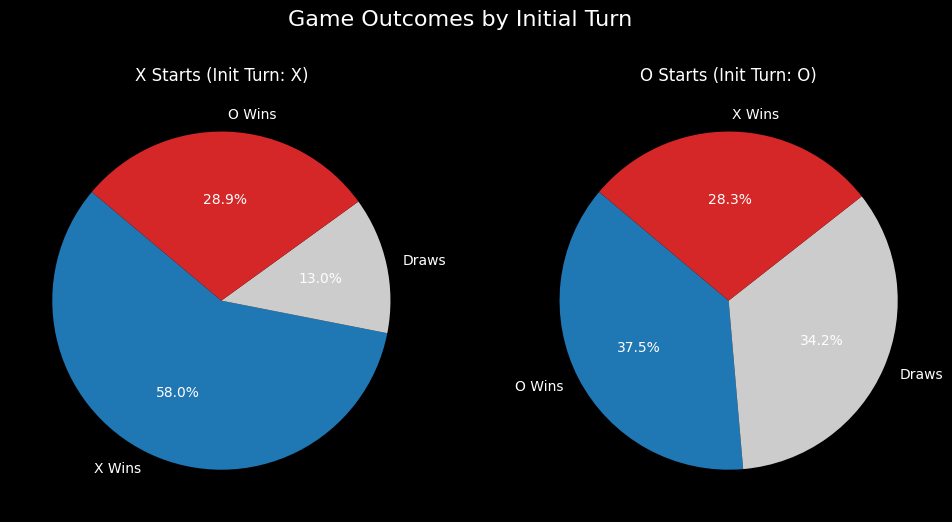

In [105]:
# Data for X starts
x_labels = ['X Wins', 'Draws', 'O Wins']
x_sizes = [x_init_win_rate, x_init_draw_rate, x_init_lose_rate]

# Data for O starts
o_labels = ['O Wins', 'Draws', 'X Wins']
o_sizes = [o_init_win_rate, o_init_draw_rate, o_init_lose_rate]

colors = ['#1f77b4', '#cccccc', '#d62728']  # blue, gray, red

plt.style.use('dark_background')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left: X starts
axes[0].pie(
    x_sizes, 
    labels=x_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
axes[0].set_title("X Starts (Init Turn: X)")

# Right: O starts
axes[1].pie(
    o_sizes, 
    labels=o_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
axes[1].set_title("O Starts (Init Turn: O)")

fig.suptitle("Game Outcomes by Initial Turn", color='white', fontsize=16)
plt.show()

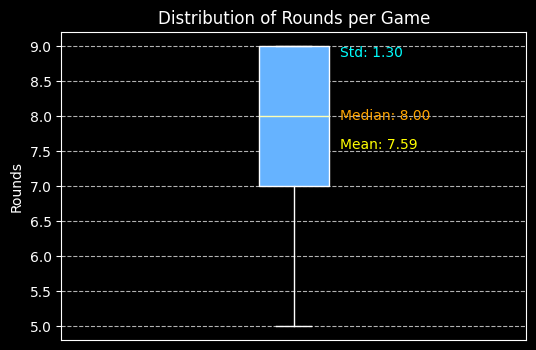

In [106]:
# Create a boxplot of the number of rounds per game
rounds = df['Rounds'].astype(int)
mean_rounds = rounds.mean()
median_rounds = rounds.median()
std_rounds = rounds.std()

plt.figure(figsize=(6, 4))
plt.boxplot(rounds, vert=True, patch_artist=True, boxprops=dict(facecolor='#66b3ff'))
plt.title('Distribution of Rounds per Game')
plt.ylabel('Rounds')
plt.xticks([])  # Remove x axis labels and title
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate mean, median, and std on the plot
plt.text(1.1, mean_rounds, f'Mean: {mean_rounds:.2f}', va='center', color='yellow')
plt.text(1.1, median_rounds, f'Median: {median_rounds:.2f}', va='center', color='orange')
plt.text(1.1, mean_rounds + std_rounds, f'Std: {std_rounds:.2f}', va='center', color='cyan')

plt.show()

In [111]:
rounds_x_win = rounds[df['Result'] == 'X']
rounds_o_win = rounds[df['Result'] == 'O']
rounds_draw = rounds[df['Result'] == 'Draw']

C:\Users\georg\AppData\Local\Temp\ipykernel_6872\1761607388.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(rounds_draw, label='Draw', fill=True, color='#cccccc', alpha=0.7)


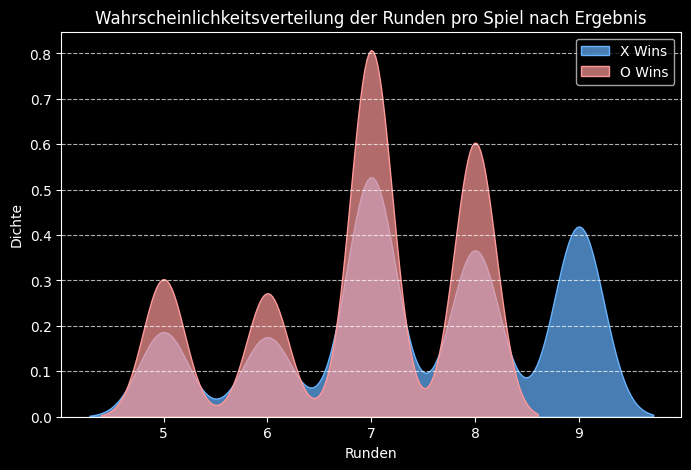

In [112]:
import seaborn as sns

# Visualisierung der Wahrscheinlichkeitsverteilung (Dichte) der Runden pro Spiel nach Ergebnis

plt.figure(figsize=(8, 5))
sns.kdeplot(rounds_x_win, label='X Wins', fill=True, color='#66b3ff', alpha=0.7)
sns.kdeplot(rounds_o_win, label='O Wins', fill=True, color='#ff9999', alpha=0.7)
sns.kdeplot(rounds_draw, label='Draw', fill=True, color='#cccccc', alpha=0.7)

plt.title('Wahrscheinlichkeitsverteilung der Runden pro Spiel nach Ergebnis')
plt.xlabel('Runden')
plt.ylabel('Dichte')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [113]:
from scipy.stats import shapiro

# Shapiro-Wilk-Test für Normalverteilung
stat_x, p_x = shapiro(rounds_x_win)
stat_o, p_o = shapiro(rounds_o_win)
stat_draw, p_draw = shapiro(rounds_draw)

print(f"X Wins:    Shapiro-Wilk-Statistik = {stat_x:.4f}, p-Wert = {p_x:.4e}")
print(f"O Wins:    Shapiro-Wilk-Statistik = {stat_o:.4f}, p-Wert = {p_o:.4e}")
print(f"Draws:     Shapiro-Wilk-Statistik = {stat_draw:.4f}, p-Wert = {p_draw:.4e}")

if p_x < 0.05:
    print("rounds_x_win ist nicht normalverteilt (p < 0.05).")
else:
    print("rounds_x_win ist normalverteilt (p >= 0.05).")

if p_o < 0.05:
    print("rounds_o_win ist nicht normalverteilt (p < 0.05).")
else:
    print("rounds_o_win ist normalverteilt (p >= 0.05).")

if p_draw < 0.05:
    print("rounds_draw ist nicht normalverteilt (p < 0.05).")
else:
    print("rounds_draw ist normalverteilt (p >= 0.05).")

X Wins:    Shapiro-Wilk-Statistik = 0.8885, p-Wert = 1.8082e-48
O Wins:    Shapiro-Wilk-Statistik = 0.8336, p-Wert = 2.5711e-50
Draws:     Shapiro-Wilk-Statistik = 1.0000, p-Wert = 1.0000e+00
rounds_x_win ist nicht normalverteilt (p < 0.05).
rounds_o_win ist nicht normalverteilt (p < 0.05).
rounds_draw ist normalverteilt (p >= 0.05).


c:\Users\georg\Projects\Tiny Games in Python\tic_tac_toe\tictactoe\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\georg\AppData\Local\Temp\ipykernel_6872\3170246978.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, patch_artist=True, labels=labels)


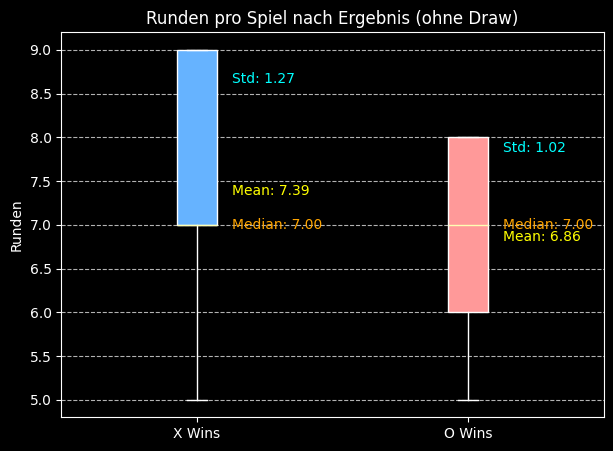

In [109]:
# Boxplot der Runden, gruppiert nach Spielergebnis (ohne Draw)


data = [rounds_x_win, rounds_o_win]
labels = ['X Wins', 'O Wins']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(7, 5))
box = plt.boxplot(data, patch_artist=True, labels=labels)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Mittelwert, Median und Standardabweichung berechnen und annotieren
for i, group in enumerate(data, 1):
    mean = group.mean()
    median = group.median()
    std = group.std()
    plt.text(i + 0.13, mean, f'Mean: {mean:.2f}', color='yellow', va='center')
    plt.text(i + 0.13, median, f'Median: {median:.2f}', color='orange', va='center')
    plt.text(i + 0.13, mean + std, f'Std: {std:.2f}', color='cyan', va='center')

plt.title('Runden pro Spiel nach Ergebnis (ohne Draw)')
plt.ylabel('Runden')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [110]:
from scipy.stats import ttest_ind

# t-Test für unabhängige Stichproben (X Wins vs O Wins)
t_stat, p_value = ttest_ind(rounds_x_win, rounds_o_win, equal_var=False)

print(f"T-Statistik: {t_stat:.4f}")
print(f"P-Wert: {p_value:.4e}")

if p_value < 0.05:
    print("Der Unterschied der durchschnittlichen Rundenlänge zwischen X Wins und O Wins ist signifikant (p < 0.05).")
else:
    print("Der Unterschied der durchschnittlichen Rundenlänge zwischen X Wins und O Wins ist nicht signifikant (p >= 0.05).")

T-Statistik: 20.2713
P-Wert: 4.9378e-89
Der Unterschied der durchschnittlichen Rundenlänge zwischen X Wins und O Wins ist signifikant (p < 0.05).
